In [1]:
import copy
import time, importlib
import h5py
import numpy as np
import os
import pandas as pd
import scipy, scipy.ndimage
import tqdm
import unyt

In [2]:
import kalepy as kale

In [3]:
import matplotlib
import matplotlib.gridspec as gridspec
import matplotlib.patheffects as patheffects

In [4]:
import palettable

In [5]:
import linefinder.analyze_data.worldlines as a_worldlines
import linefinder.config as l_config

In [6]:
import galaxy_dive.plot_data.plotting as plotting

In [7]:
import coolingFunction

In [8]:
import trove
import verdict
from py2tex import py2tex

In [9]:
%matplotlib inline

# Parameters

In [10]:
pm = dict(
    snum = 600,
    ahf_index = 600,
)

In [11]:
pm = trove.link_params_to_config(
    '/home1/03057/zhafen/papers/Hot-Accretion-in-FIRE/analysis/hot_accretion.trove',
    script_id = 'nb.8',
    **pm
)

In [12]:
sim_name = pm['variation']

In [13]:
print( sim_name, pm['global_variation'] )

m12i_md track_all_thin_disk_stars


# Load Data

In [14]:
w = a_worldlines.Worldlines(
    tag = pm['tag'],
    data_dir = pm['data_dirs']['jug.4'],
    halo_data_dir = pm['halo_data_dir'],
    ahf_index = pm['ahf_index'],
)

In [15]:
w.data_dir

'/scratch/03057/zhafen/hot_accretion_data/more_variations/track_all_thin_disk_stars/m12i_md'

In [16]:
data_fp = os.path.join( pm['processed_data_dir'], 'summary.hdf5' )
data = verdict.Dict.from_hdf5( data_fp, create_nonexistent=True )

# Analyze

## Calculate Central Indices

In [17]:
calc_fn = getattr( w, 'calc_{}'.format( pm['central_indices'] ) )
inds = calc_fn(
    lookback_time_max = pm['lookback_time_max'],
    choose_first = pm['choose_first'],
)

100%|██████████| 100000/100000 [00:02<00:00, 42606.50it/s]


In [18]:
t_tchange_key = pm['central_indices'].split( '_' )[0]
tchange = w.get_data( t_tchange_key )

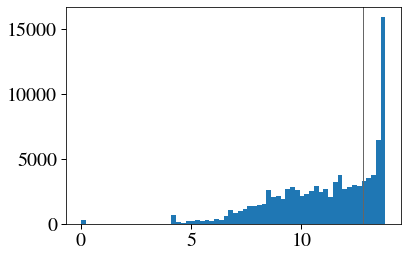

In [19]:
fig = plt.figure()
ax = plt.gca()

_ = ax.hist(
    tchange,
    bins = 64,
)

ax.axvline(
    w.get_data( 'time' )[0] - 1.,
    color = pm['background_linecolor'],
    linewidth = 1,
)